# L08-TimeseriesOpEd

## Author - Rodolfo Lerma

## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


Instructions

Using the California dairy production dataset, create a new notebook or use Studentname-L08-RegressionSim.ipynb to perform time series analysis on one of the following categories:

    Cottage Cheese Production
    Milk Production
    Ice Cream Production (your choice):

Use this analysis to answer the following questions:

    Is this time series stationary?
    Is there a significant seasonal component to this time series?
    Perform STL decomposition of the time series. Should this decomposition be performed with the additive or multiplicative (log of values) model? Are the residuals stationary?
    Use the auto_arima function from the pmdarima package to find a best model fit, excluding the last 12 months of observations from the training data, and setting d=1 and D=1 and limit p, q, P and Q to 3 with starting values of 1. Which model coefficients are statistically significant?

Then forecast production for the last 12 months of the data and report both the numeric values and plot the prediction vs. the actual production values with the calculated prediction intervals.

        Are the predictions close to the actual observations?
        Are the residuals approximately Normally distributed?
        What is the RMSE? Is this value small relative to the forecasted values?
        Are the confidence intervals reasonably small compared to the forecast means?
        How do the confidence intervals behave as time moves to the future?


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.random as nr
import scipy.stats as ss
import statsmodels.tsa.seasonal as sts
import statsmodels.graphics.tsaplots as splt
import statsmodels.tsa.arima_process as arima
from statsmodels.tsa.stattools import adfuller
import numpy as np

# First look at the data

In [2]:
#fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"
fileName = "CADairyProduction.csv"

In [3]:
lactose = pd.read_csv(fileName)

In [4]:
print(lactose.head(4))
print(lactose.tail(4))

   Year Month  Cotagecheese.Prod  Icecream.Prod  Milk.Prod  N.CA.Fat.Price  \
0  1995   Jan              4.370         51.595      2.112          0.9803   
1  1995   Feb              3.695         56.086      1.932          0.8924   
2  1995   Mar              4.538         68.453      2.162          0.8924   
3  1995   Apr              4.280         65.722      2.130          0.8967   

   Month.Count  monthNumSqred  monthNumCubed  
0            1              1              1  
1            2              4              8  
2            3              9             27  
3            4             16             64  
     Year Month  Cotagecheese.Prod  Icecream.Prod  Milk.Prod  N.CA.Fat.Price  \
224  2013   Sep              2.193         74.871      3.197          1.5519   
225  2013   Oct              2.284         70.011      3.338          1.5566   
226  2013   Nov              1.865         61.394      3.275          1.7537   
227  2013   Dec              2.345         53.653     

In [5]:
lactose.dtypes

Year                   int64
Month                 object
Cotagecheese.Prod    float64
Icecream.Prod        float64
Milk.Prod            float64
N.CA.Fat.Price       float64
Month.Count            int64
monthNumSqred          int64
monthNumCubed          int64
dtype: object

In [6]:
lactose = lactose.rename(columns={"Cotagecheese.Prod": "Cotage", "Icecream.Prod": "Icecream","Milk.Prod": "Milk","Month.Count": "Month_Cnt","monthNumSqred": "Month_Cnt2"})

In [7]:
lactose['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [8]:
look_up = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5,
            'Jun': 6, 'Jul': 7, 'Aug': 8,  'Sep': 9, 'Oct': 10, 'Nov': 11,'Dec': 12}

In [9]:
lactose['month'] = lactose['Month'].apply(lambda x: look_up[x])
lactose['Date'] = pd.to_datetime(lactose[['Year','month']].assign(DAY=1))
lactose.index = lactose['Date']

Quick look at the data for the main 3 products in this DataFrame:

Text(0.5, 1.0, 'California Dairy production time series')

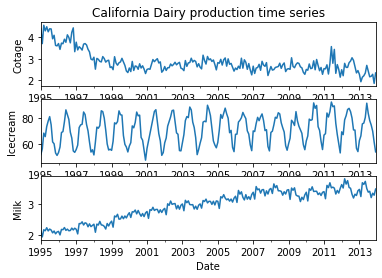

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
lactose.Cotage.plot(ax = ax1)
lactose.Icecream.plot(ax = ax2)
lactose.Milk.plot(ax = ax3)
ax1.set_ylabel('Cotage')
ax2.set_ylabel('Icecream')
ax3.set_ylabel('Milk')
ax3.set_xlabel('Date')
ax1.set_title('California Dairy production time series')

In [11]:
np.__version__

'1.19.5'

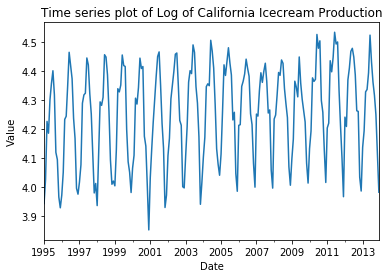

In [12]:
def plot_ts(ts, lab = ''):
    ts.plot()
    plt.title('Time series plot of ' + lab)
    plt.ylabel('Value')
    plt.xlabel('Date')

lactose['Icecream_log'] = np.log(lactose.Icecream)
plot_ts(lactose.Icecream_log, 'Log of California Icecream Production')

In [13]:
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

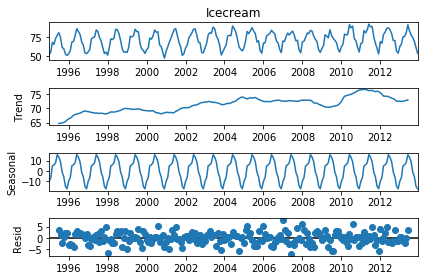

In [14]:
icecream_decomp = decomp_ts(lactose.Icecream)

In [15]:
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))

DF_Test(icecream_decomp.resid[6:-6])   

D-F statistic = -10.615314403551855
p-value = 5.694807144315025e-19
number of lags used = 9
Critical value at 5% confidence = -2.8756749365852587
Critical value at 10% confidence = -2.5743041549627677


Given the DF statistic and p-value we can reject the null hypothesis that the residual is not stationary. Then the residual will be treated as stationary.

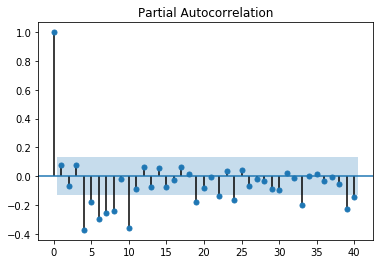

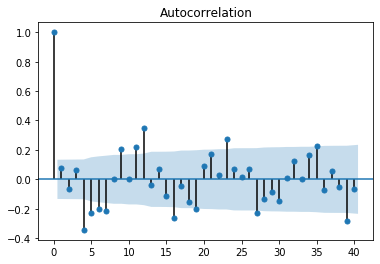

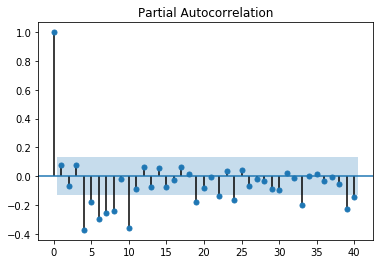

In [16]:
splt.plot_acf(icecream_decomp['1995-07-01':'2013-06-01'].resid, lags = 40)
splt.plot_pacf(icecream_decomp['1995-07-01':'2013-06-01'].resid, lags = 40)

In [17]:
#pip install pyramid-arima

In [18]:
#pip install --user pmdarima 

In [33]:
# pmdarima as pm

In [21]:
#order = (2,1,1) needs to be corrected

In [22]:
def model_ARIMA(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    print(model_fit.summary())
    return(model_fit)

#arima_icecream = model_ARIMA(icecream_decomp.resid[6:-6], order = (2,1,1))

# Forcasting Time Series

In [23]:
from scipy.stats import zscore

lactose.loc[:, ['Month_Cnt', 'Month_Cnt2']] = lactose.loc[:, ['Month_Cnt', 'Month_Cnt2']].apply(zscore)

In [24]:
lactose['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [25]:
## Create dummy variables for the months
years = int(len(lactose.Icecream)/12)
dummies = pd.get_dummies(lactose.loc[:, 'Month'])
lactose[list(dummies.columns)] = dummies
## Print the head of the data frame to look at the dummy variables.
lactose.head(12)

,Year,Month,Cotage,Icecream,Milk,N.CA.Fat.Price,Month_Cnt,Month_Cnt2,monthNumCubed,month,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,1995,Jan,4.370,51.595,2.112,0.9803,-1.724471,-1.120740,1,1,...,0,0,1,0,0,0,0,0,0,0
1995-02-01,1995,Feb,3.695,56.086,1.932,0.8924,-1.709277,-1.120548,8,2,...,0,1,0,0,0,0,0,0,0,0
1995-03-01,1995,Mar,4.538,68.453,2.162,0.8924,-1.694084,-1.120226,27,3,...,0,0,0,0,0,1,0,0,0,0
1995-04-01,1995,Apr,4.280,65.722,2.130,0.8967,-1.678890,-1.119776,64,4,...,0,0,0,0,0,0,0,0,0,0
1995-05-01,1995,May,4.470,73.730,2.227,0.8967,-1.663696,-1.119198,125,5,...,0,0,0,0,0,0,1,0,0,0
1995-06-01,1995,Jun,4.238,77.994,2.124,0.9160,-1.648503,-1.118491,216,6,...,0,0,0,0,1,0,0,0,0,0
1995-07-01,1995,Jul,4.377,81.475,2.184,0.9160,-1.633309,-1.117656,343,7,...,0,0,0,1,0,0,0,0,0,0
1995-08-01,1995,Aug,4.368,74.981,2.152,0.8934,-1.618116,-1.116692,512,8,...,0,0,0,0,0,0,0,0,0,0
1995-09-01,1995,Sep,3.917,61.530,2.062,0.8934,-1.602922,-1.115600,729,9,...,0,0,0,0,0,0,0,0,0,1


In [26]:
import sklearn.linear_model as lm
X = lactose.loc[:'2012-12-01', ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
Y = lactose.loc[:'2012-12-01', 'Icecream'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

## and the predictions and the residual
lactose.loc[:'2012-12-01', 'scores'] = mod_fit.predict(X)
lactose.loc[:'2012-12-01', 'resids'] = lactose.loc[:'2012-12-01', 'scores'] - lactose.loc[:'2012-12-01', 'Icecream']

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


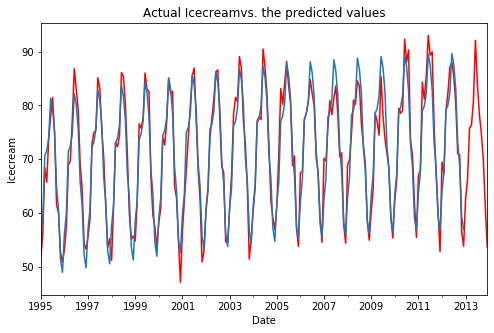

In [27]:
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis

plot_mod_fit(lactose, 'Icecream')   

In [28]:
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

## Make the forecast for the next year
X = lactose.loc['2012-12-01':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
rmse_value = RMSE(lactose.loc['2012-12-01':, 'Icecream'].as_matrix(), mod_fit.predict(X))

print('The RMSE Value for the ICECREAM regression is '+ str(rmse_value))

The RMSE Value for the ICECREAM regression is 1.5459393430180413


C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


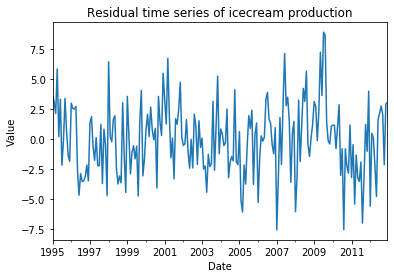

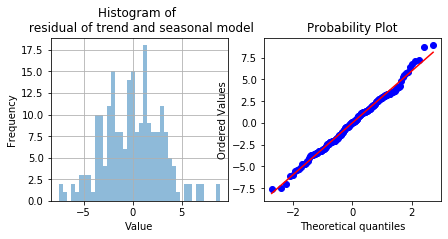

In [29]:
def plot_ts(ts, title):
    ts.plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')

plot_ts(lactose.loc[:'2012-12-01', 'resids'], title = 'Residual time series of icecream production')

def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    ts.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of ' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax2)
    
dist_ts(lactose.loc[:'2012-12-01', 'resids'], '\n residual of trend and seasonal model')

The time series plot of the residual shows some minor periodic behavior. The distribution plots show the values to be close to Normally distributed. 

One other question we can ask is if the residual series is stationary. The code in the cell below applies the Dicky Fuller test. Execute this code and examine the results. 


In [30]:
DF_Test(lactose.loc[:'2012-12-01', 'resids'])

D-F statistic = -3.892446370847832
p-value = 0.002091146310817178
number of lags used = 15
Critical value at 5% confidence = -2.876102355
Critical value at 10% confidence = -2.574532225


Notice that the results are marginal, but still smaller than 0.05, therefore we can reject the null hypothesis (the time series IS stationary) at the 95% confidence level.

Now, we will compute an ARIMA model for the residual using the `step_ARIMA` function we used earlier. We will train this model, without the last 12 months of data, which we will use to evaluate the model. Execute the code in the cell below to search for the best ARIMA mode order.

In [31]:
def model_ARIMA_2(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.arima_model import ARIMAResults    
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    BIC = ARIMAResults.bic(model_fit)
    print('Testing model of order: ' + str(order) + ' with BIC = ' + str(BIC))
    return(BIC, order, model_fit)

def step_ARIMA(resid, p_max, d_max, q_max):
    from statsmodels.tsa.arima_model import ARIMAResults    
    from statsmodels.tsa.arima_model import ARIMA
    best_BIC = 9999999999999999.0
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if(p > 0 or q > 0):
                    try:
                        order = (p, d, q)
                        BIC, order, model = model_ARIMA_2(resid, order)
                        if(BIC < best_BIC):
                            best_model = model
                            best_BIC = BIC
                            best_order = order
                    except: 
                        pass        
    return(best_BIC, best_order, best_model) 

In [35]:
#A new package is available that could replace model_ARIMA_2 method. The method auto_arima is part of pyramid package. 
#The advantages of this package is that it can omit the errors/warning you might face during the iterative process. 
#For more details on how to use the method, please see documentation at https://www.alkaline-ml.com/pyramid/modules/generated/pyramid.arima.auto_arima.html, 
#and example on how to use at https://www.alkaline-ml.com/pyramid/quickstart.html#
#The code below could replace the code in Cell [38] 
from pmdarima.arima import auto_arima
stepwise_fit = auto_arima(icecream_decomp.resid[6:-6], start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1164.835, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1111.213, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1122.352, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1103.886, Time=0.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1071.415, Time=1.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1073.263, Time=0.40 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1061.974, Time=3.08 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1073.865, Time=1.35 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1087.468, Time=2.19 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=1038.615, Time=3.05 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=1039.235, Time=1.76 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1038.308, Time=1.99 sec
 ARIMA(2,1,0)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  216
Model:             SARIMAX(2, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -513.682
Date:                                 Thu, 11 Feb 2021   AIC                           1037.364
Time:                                         16:34:07   BIC                           1053.930
Sample:                                              0   HQIC                          1044.066
                                                 - 216                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6097      0.075     -8.167      0.000      -0.756      -0.463
ar.L2         -0.4136      0.068     -6.121      0.000      -0.546      -0.281
ma.S.L12      -0.5276      0.084     -6.284      0.000      -0.692      -0.363
ma.S.L24      -0.2373      0.081     -2.941      0.003      -0.395      -0.079
sigma2         8.8014      0.883      9.967      0.000       7.071      10.532
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 4.70
Prob(Q):                              0.84   Prob(JB):                         0.10
Heteroskedasticity (H):               1.43   Skew:                             0.37
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
#BIC, order, model_fit = step_ARIMA(lactose.loc[:'2012-12-01', 'resids'], 4, 3, 4)    
#print('Best order = ' + str(order) + ' best BIC = ' + str(BIC))

In [37]:
arima_remainder = model_ARIMA(lactose.loc[:'2012-12-01', 'resids'], order = (0,0,3))

                              ARMA Model Results                              
Dep. Variable:                 resids   No. Observations:                  216
Model:                     ARMA(0, 3)   Log Likelihood                -519.513
Method:                           mle   S.D. of innovations              2.678
Date:                Thu, 11 Feb 2021   AIC                           1047.027
Time:                        16:36:04   BIC                           1060.528
Sample:                    01-01-1995   HQIC                          1052.481
                         - 12-01-2012                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma.L1.resids     0.2807      0.065      4.318      0.000       0.153       0.408
ma.L2.resids     0.0896      0.067      1.330      0.184      -0.042       0.222
ma.L3.resids     0.3649      0.062      5.87

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was

In [49]:
start_index = len(lactose.loc[:'2012-12-01', 'resids'])
end_index = start_index + 12
model_prediction = stepwise_fit.predict(index = lactose.loc[:'2012-12-01'])
len(model_prediction)

10

We are now ready to compute the prediction for the last 12 months of the log of the electric production time series. The prediction is the combination of the trend, seasonal, and residual (ARIMA) models. The code in the cell below computes this prediction. Execute this code to compute the prediction. 

In [50]:
###################### Fix This Line #########################
## Make the forecast for the next year
X = lactose.loc['2012-12-01':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
## and the predictions for the forecast
lactose.loc['2012-12-01':, 'scores'] =  stepwise_fit.predict(X) - model_prediction

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


TypeError: n_periods must be an int

In [ ]:
plot_mod_fit(lactose, 'Icecream') 

In [ ]:
rmse_value2 = RMSE(lactose.loc['2012-12-01':, 'Icecream'].as_matrix(), lactose.loc['2012-12-01':, 'scores'])

print('The RMSE Value for the ICECREAM regression (ARIMA) is '+ str(rmse_value2))

Hi Kelly. Good question. The confidence intervals (CI) were covered in lesson 5A (and you can find more YouTube videos and other good content). What you need to do here is to find residuals (difference between forecasted and actual) and evaluate these carefully. We know that we found a good model, if the residuals are noise - independent observations centered at zero (they do NOT need to be Gaussian noise, which is a stricter assumption).

You can check for independence 2 ways:

    qualitatively by observing the plots of the residuals. Dependence is either noted OR it cannot be stated. Just because we do not see something, does not mean it does not exist - then use quantitative testing.
    quantitatively - by making assumptions and testing hypothesis. For example, Chi^2 Test for Independence.

You can check for presence of a zero 2 ways:

    qualitatively ... :)
    quantitatively. Again, with some assumptions you can test a hypothesis, WHICH is equivalent to determining whether zero is in the 95% CI or not.

So, you need to compute the usual CI on the residuals and make your conclusion about zero being in the interval or not.

The RMSE has improved from 1.546 to 2.535. Adding the ARIMA component to the model has not improved the prediction. 

In [ ]:
Production_ice = lactose['Icecream']
Prediction_ice = lactose['scores']

In [ ]:
#Kernel Density Estimation Plots (to take a look at the Distribution for each of the variables)
import seaborn as sns
def kde_plot(a,b,c,d,e):
    fig = plt.figure(figsize=(6,4)) # Define plot area
    ax = fig.gca() # Define axis 
    sns.set_style("whitegrid")
    sns.kdeplot(a, ax = ax, label = c)
    sns.kdeplot(b, ax = ax, label = d)
    ax.set_title('KDE plot of ' + e, fontsize = 15) # Give the plot a main title
    ax.set_xlabel('Icecream', fontsize = 15) # Set text for the x axis
    ax.set_ylabel('Density', fontsize = 15)# Set text for y axis
    ax.legend(loc='upper left', fontsize=15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True) 
    
kde_plot(Production_ice,Prediction_ice,"Production","Prediction","Icecream Production")

In [ ]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)   
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.show()

In [ ]:
#diffs = pd.Series(diffs)
Delta = Production_ice - Prediction_ice
Delta =  pd.Series(Delta)
Delta = Delta.reset_index()
Delta = Delta.iloc[:,1]
#print(Delta)
plot_hist(Delta)

In [ ]:
def t_test(a, b, alpha, alternative='two-sided'):
    import statsmodels.stats.weightstats as ws 
    diff = a.mean() - b.mean()
    res = ss.ttest_ind(a, b, equal_var=False)  
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()
    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

In [ ]:
Production_ice_log = pd.Series(np.log(lactose['Icecream']))
Production_ice_log = Production_ice_log.reset_index(drop=True)

Prediction_ice_log = pd.Series(np.log(lactose['scores']))
Prediction_ice_log = Prediction_ice_log.reset_index(drop=True)

#print(Production_ice_log)
#rest_index(drop = True)
#Prediction_ice_log = pd.Series(np.log(lactose['scores']).rest_index(drop = True)

In [ ]:
t_test(Prediction_ice_log,Production_ice_log,0.05)